In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [3]:
#Clean data

# 2019 broadband data file
broad_2019 = pd.read_csv("input/broadband_data_2019November.csv")
# Clean the data set by dropping rows with missing values
broad_2019[' BROADBAND USAGE '] = pd.to_numeric(broad_2019[' BROADBAND USAGE '], errors='coerce')
broad_2019[' BROADBAND AVAILABILITY PER FCC '] = pd.to_numeric(
    broad_2019[' BROADBAND AVAILABILITY PER FCC '], errors='coerce')
nan_value = float("NaN")
broad_2019.replace("-", nan_value, inplace = True)
broad_2019.dropna(subset = [' BROADBAND USAGE '], inplace = True)
broad_2019.dropna(subset = [' BROADBAND AVAILABILITY PER FCC '], inplace = True)
#broad_2019 = broad_2019.sort_values(by = [' BROADBAND AVAILABILITY PER FCC '])

# 2020 broadband data file
broad_2020 = pd.read_csv("input/broadband_data_2020October.csv")
# Clean the data by dropping rows with missing values
broad_2020[' BROADBAND USAGE '] = pd.to_numeric(broad_2020[' BROADBAND USAGE '], errors='coerce')
broad_2020[' BROADBAND AVAILABILITY PER FCC '] = pd.to_numeric(
    broad_2020[' BROADBAND AVAILABILITY PER FCC '], errors='coerce')
broad_2020.replace("-", nan_value, inplace = True)
broad_2020.dropna(subset = [' BROADBAND USAGE '], inplace = True)
broad_2020.dropna(subset = [' BROADBAND AVAILABILITY PER FCC '], inplace = True)
#broad_2020 = broad_2020.sort_values(by = [' BROADBAND AVAILABILITY PER FCC '])

# broadband challenge file
#broad_challenge = pd.read_csv("./input/broadband_data_opendatachallenge.csv")

# broadband by zip code
broad_zip = pd.read_csv("input/broadband_data_zipcode.csv")

([<matplotlib.axis.XTick at 0x20d26d434c0>,
 [Text(1, 0, '2019'), Text(2, 0, '2020')])

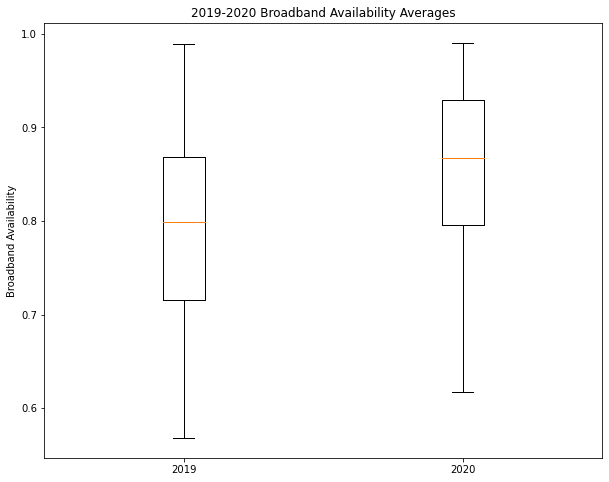

In [4]:
#Plot boxplots of Broadband Availability Averages for 2019 and 2020
#The broadband availability of each state (average of all the counties) represents one point in the plot.
#The overall national availability can thus be depicted here.

#set up windows, axis titles, chart title
plt.rcParams['figure.figsize'] = [10, 8]
plt.ylabel('Broadband Availability')
plt.title('2019-2020 Broadband Availability Averages')

#get unique states (should be 51 including DC)
states = broad_2019['ST'].unique()
#init availiability means
availMeans2019 = []

#get each state in 2019 Broadband Availability by FCC
for s in states :
    uniqueState = broad_2019.loc[broad_2019['ST'] == s]
    #calculate mean of all the counties in that state
    availMeans2019.append(uniqueState[' BROADBAND AVAILABILITY PER FCC '].mean())
    
#do similar for 2020
states = broad_2020['ST'].unique()
availMeans2020 = []
for s in states :
    uniqueState = broad_2020.loc[broad_2020['ST'] == s]
    availMeans2020.append(uniqueState[' BROADBAND AVAILABILITY PER FCC '].mean())

#Boxplot of state availability means by year
plt.boxplot([availMeans2019, availMeans2020])
#Label x axis
plt.xticks([1, 2], ['2019', '2020'])

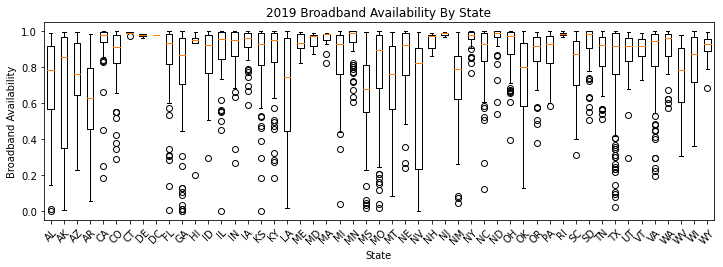

In [52]:
#Plot boxplots of 2020 Broadband Availability Averages per state
#The broadband availability of a county represents one point of data in a boxplot that represents the state.

#set up plot window
plt.rcParams['figure.figsize'] = [12, 8]
plt.subplot(2,1,1)
plt.xlabel('State')
plt.ylabel('Broadband Availability')
plt.title('2019 Broadband Availability By State')

#get unique states
states = broad_2020['ST'].unique()
#init array that contains arrays of all the county availabilities for state
stateAvails = []
#init array of means for each state (average of all counties in that state)
stateAvailMeans = []

#store data in array
#stateAvails stores each county in state s
for s in states :
    stateAvails.append(broad_2020[' BROADBAND AVAILABILITY PER FCC '].loc[(broad_2020['ST'] == s)])
    stateAvailMeans.append([s, stateAvails[-1].mean()])

#plot the data
plt.boxplot(stateAvails)
x = np.linspace(1,51, 51)
plt.xticks(x, states, rotation=45)
plt.show()

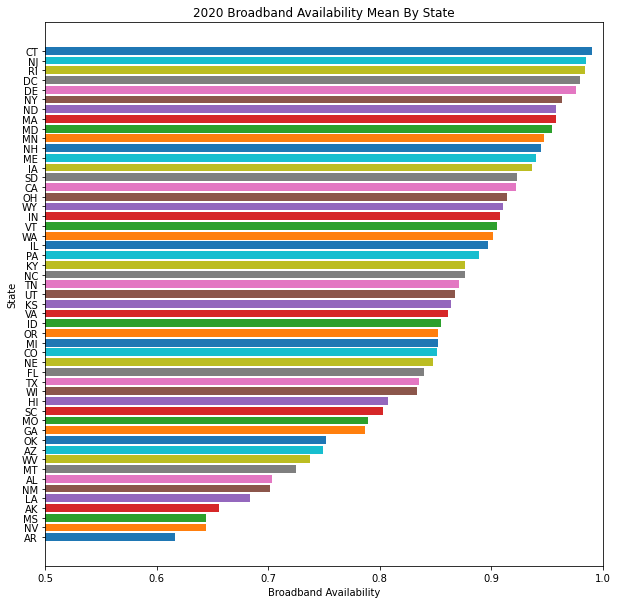

In [53]:
#Plot bargraphs of 2020 Broadband Availability means per state

#set up plot window
plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Broadband Availability')
plt.ylabel('State')
plt.title('2020 Broadband Availability Mean By State')
plt.xlim(.5,1)

#sort the data by availability
stateAvailMeans.sort(key=lambda a: a[1])

#plot the data
for s in stateAvailMeans :
    plt.barh(s[0], s[1])


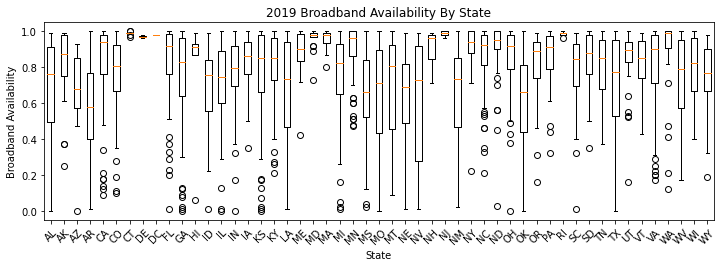

In [55]:
#Plot boxplots of 2019 Broadband Availability Averages per state
#The broadband availability of a county represents one point of data in a boxplot that represents the state.

#set up plot window
plt.rcParams['figure.figsize'] = [12, 8]
plt.subplot(2,1,1)
plt.xlabel('State')
plt.ylabel('Broadband Availability')
plt.title('2019 Broadband Availability By State')

#get unique states
states = broad_2019['ST'].unique()
#init array that contains arrays of all the county availabilities for state
stateAvails = []
#init array of means for each state (average of all counties in that state)
stateAvailMeans = []

#store data in array
#stateAvails stores each county in state s
for s in states :
    stateAvails.append(broad_2019[' BROADBAND AVAILABILITY PER FCC '].loc[(broad_2019['ST'] == s)])
    stateAvailMeans.append([s, stateAvails[-1].mean()])

#plot the data
plt.boxplot(stateAvails)
x = np.linspace(1,51, 51)
plt.xticks(x, states, rotation=45)
plt.show()

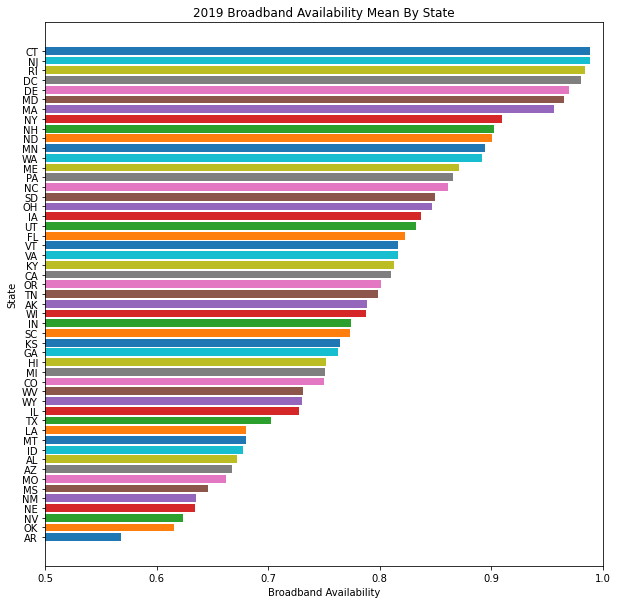

In [56]:
#Plot bargraphs of 2020 Broadband Availability means per state

#set up plot window
plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Broadband Availability')
plt.ylabel('State')
plt.title('2019 Broadband Availability Mean By State')
plt.xlim(.5,1)

#sort the data by availability
stateAvailMeans.sort(key=lambda a: a[1])

#plot the data
for s in stateAvailMeans :
    plt.barh(s[0], s[1])
